In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기

In [94]:
train = pd.read_csv('./Data/future_titanic/train(4).csv')
test = pd.read_csv('./Data/future_titanic/test(4).csv')

In [95]:
train.shape, test.shape

((8693, 14), (4277, 13))

In [96]:
y = train['Transported']
df = pd.concat([train,test], axis = 0)

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


PassengerID : 탑승객 고유 아이디. gggg_pp 에서 gggg: 승객 그룹 식별 번호, pp: 그룹 내 사람 식별 번호
HomePlanet : 승객이 본래 거주하는 행성
CryoSleep : 항해 중 승객의 동면 여부
Cabin : 승객이 체류하는 객실 번호. deck/num/side 형태
side 중 P: Port, S: Starboard
Destination : 목적지
Age : 나이
VIP : 승객이 VIP 서비스를 받는지 여부
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck --> 항해 중 승객이 지불한 서비스 요금
Name : 이름
Transported : 시공간 이상에 의한 이송 여부


# column 별 EDA

### HomePlanet

In [98]:
df['HomePlanet'].value_counts()
#개수 확인

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

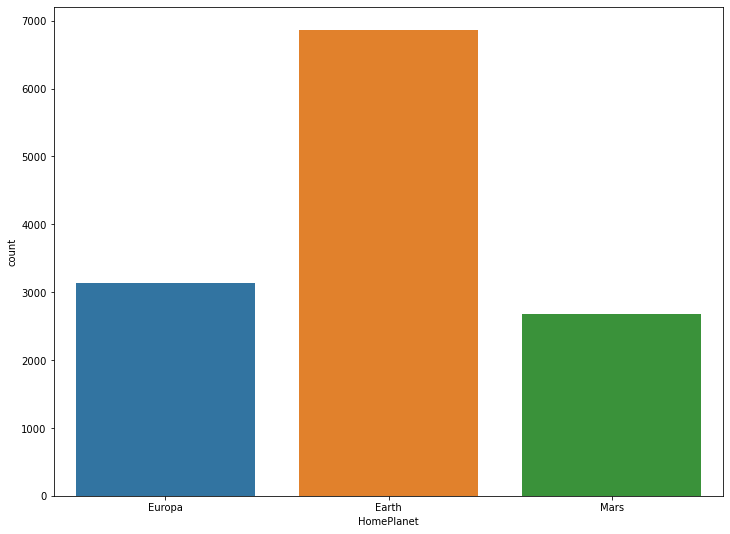

In [99]:
plt.figure(figsize=(12,9))
sns.countplot(data = df,x='HomePlanet')

# Earth 가 가장 많고 그 다음으로 Europa, Mars 순인 것을 확인

### CryoSleep

In [100]:
df['CryoSleep'].value_counts()

# 동면 여부 확인

False    8079
True     4581
Name: CryoSleep, dtype: int64

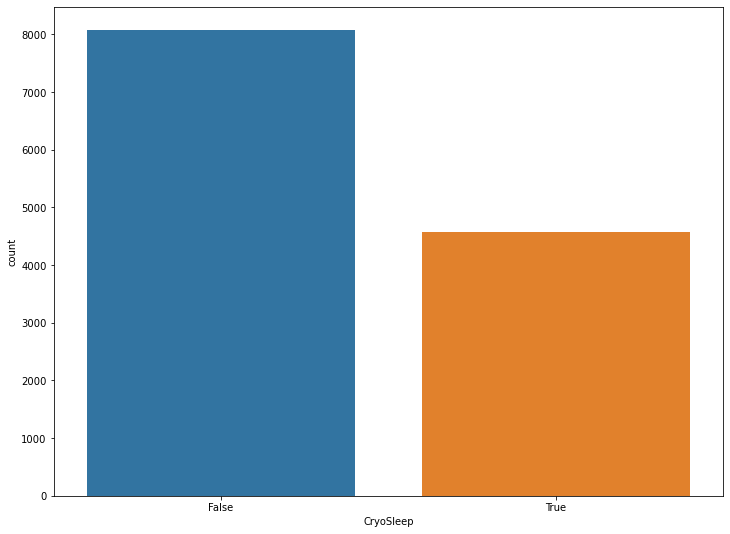

In [101]:
plt.figure(figsize=(12,9))
sns.countplot(data = df,x='CryoSleep')
plt.show()
# Earth 가 가장 많고 그 다음으로 Europa, Mars 순인 것을 확인

In [102]:
df['CryoSleep'] = df['CryoSleep'].apply(lambda x: int(1) if x == 'True' else int(0))

### Cabin

In [103]:
#train[train['Cabin'].dtypes != str]
df['Cabin'] = df['Cabin'].fillna('NO-RESPONSE/NO-RESPONSE/NO-RESPONSE') # 처리 전 결측치는 응답이 없는 NO-RESPONSE 로 채워넣기

# deck/num/side 순으로 정보를 나눳기 때문에 이를 3가지 변수로 따로 설정
# 체류한 객실 정보 확인

In [104]:
df['Cabin_deck'] = df['Cabin'].apply(lambda x : x.split('/')[0])
df['Cabin_num'] = df['Cabin'].apply(lambda x : x.split('/')[1])
df['Cabin_side'] = df['Cabin'].apply(lambda x : x.split('/')[2])

# / 를 기준으로 deck, num, side 를 나누어주었습니다.

In [105]:
#train = train.drop(columns='Cabin')
#train

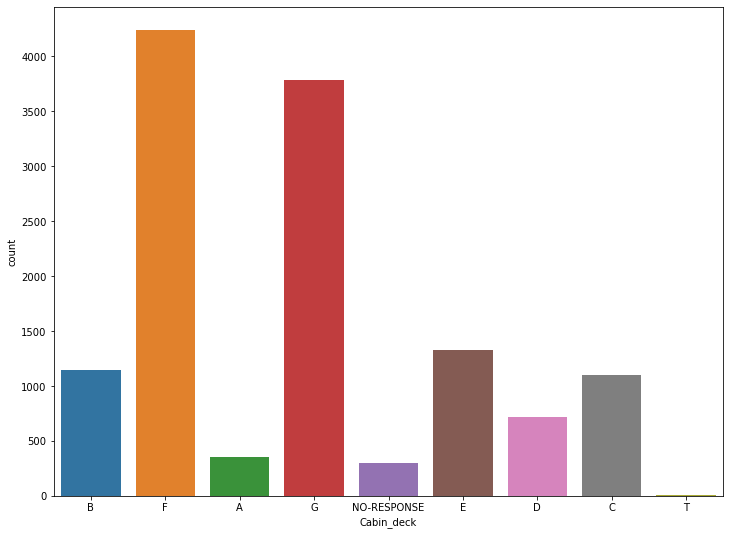

In [106]:
plt.figure(figsize=(12,9))
sns.countplot(data = df,x='Cabin_deck')
plt.show()

In [107]:
df['Cabin_num'].unique()

# plt.figure(figsize=(12,9))
# sns.histplot(data = train,x='Cabin_num')
# plt.show()

array(['0', '1', '2', ..., '1885', '1887', '1890'], dtype=object)

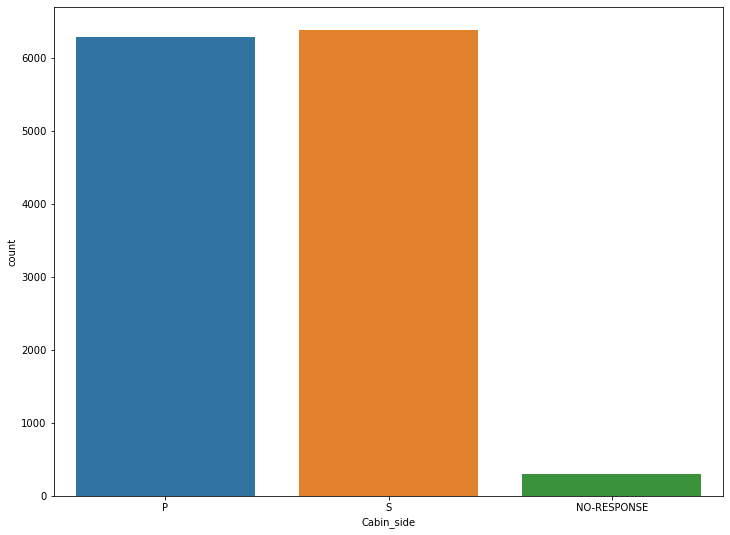

In [108]:
plt.figure(figsize=(12,9))
sns.countplot(data = df,x='Cabin_side')
plt.show()

### Destination

In [109]:
df['Destination'].value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

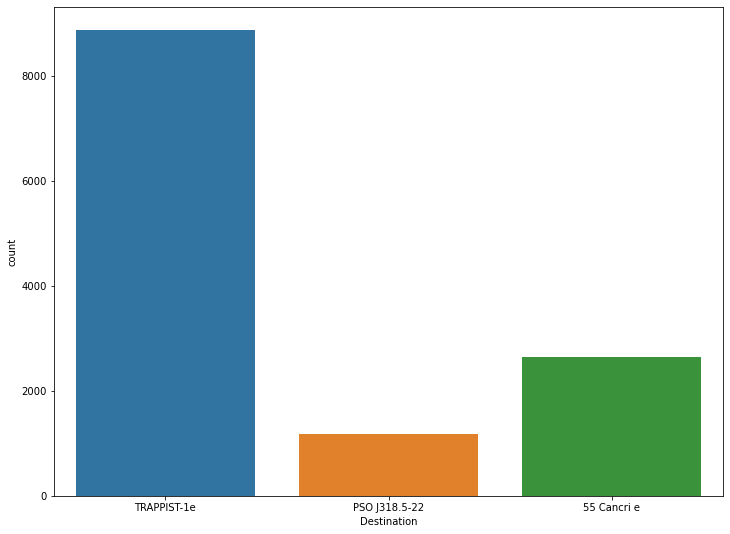

In [110]:
plt.figure(figsize=(12,9))
sns.countplot(data = df,x='Destination')
plt.show()

# 범주형

### 나이

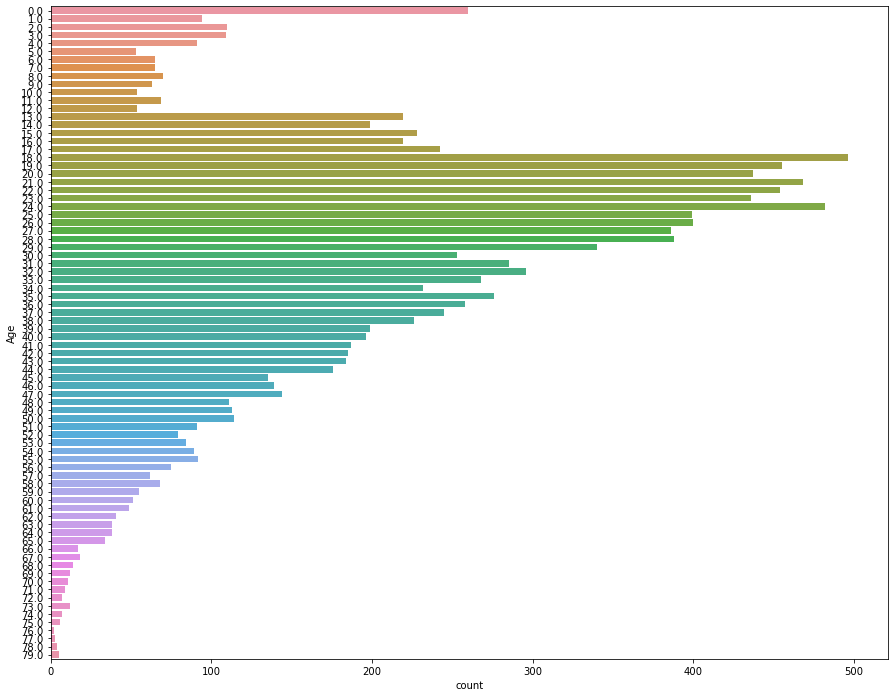

In [111]:
plt.figure(figsize=(15,12))
sns.countplot(data = df,y='Age')
plt.show()

### VIP

In [112]:
df['VIP'].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

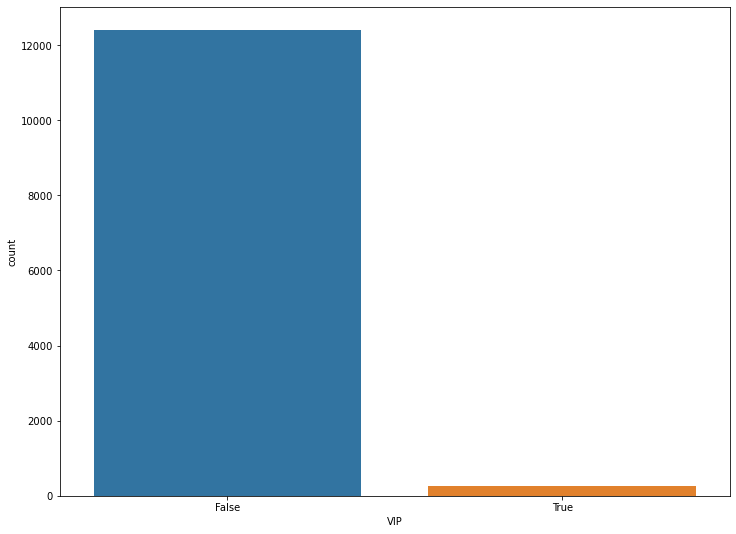

In [113]:
plt.figure(figsize=(12,9))
sns.countplot(data = df,x='VIP')
plt.show()

In [114]:
df['VIP'] = df['VIP'].apply(lambda x: int(1) if x == 'True' else int(0))

### RoomService

In [115]:
df['RoomService'].value_counts()

0.0       8303
1.0        185
2.0        113
3.0         89
4.0         71
          ... 
1203.0       1
963.0        1
1220.0       1
1404.0       1
1174.0       1
Name: RoomService, Length: 1578, dtype: int64

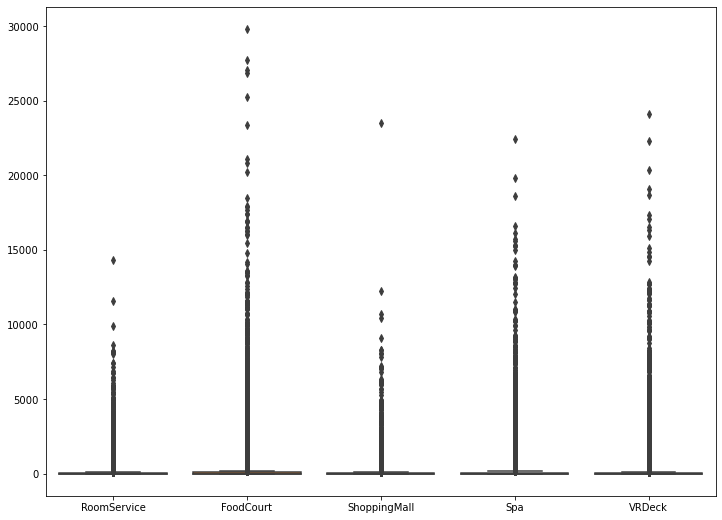

In [116]:
plt.figure(figsize=(12,9))
sns.boxplot(data = df[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
plt.show()

# 이상치 탐지를 위해 box plot 사용

모델 성능 향상을 위해 이상치 처리

In [117]:
df['RoomService'] = df['RoomService'].apply(lambda x : 10000 if x > 10000 else x)
df['FoodCourt'] = df['FoodCourt'].apply(lambda x : 20000 if x > 20000 else x)
df['ShoppingMall'] = df['ShoppingMall'].apply(lambda x : 12500 if x > 12500 else x)
df['Spa'] = df['Spa'].apply(lambda x : 20000 if x > 20000 else x)
df['VRDeck'] = df['VRDeck'].apply(lambda x : 20000 if x > 20000 else x)

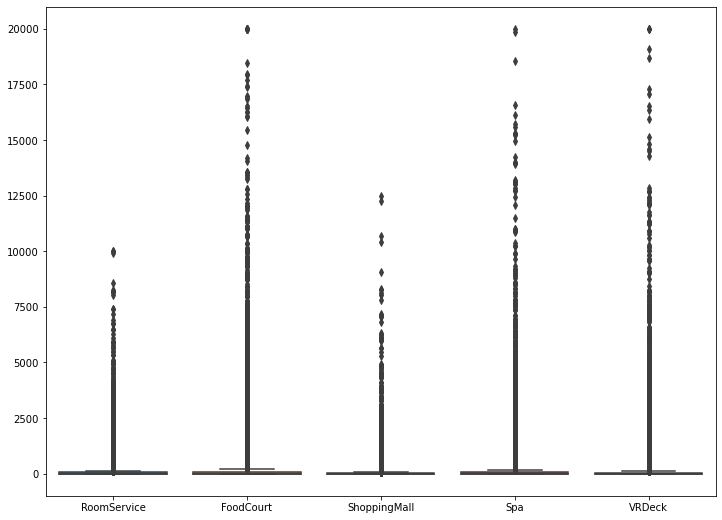

In [118]:
plt.figure(figsize=(12,9))
sns.boxplot(data = df[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
plt.show()

# 데이터 결측치 처리

In [119]:
df.isnull().sum()
# 결측치 확인

PassengerId        0
HomePlanet       288
CryoSleep          0
Cabin              0
Destination      274
Age              270
VIP                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
Cabin_deck         0
Cabin_num          0
Cabin_side         0
dtype: int64

범주형 변수의 경우 unknown 카테고리로 대체

In [120]:
df[['HomePlanet','CryoSleep','Destination']] = df[['HomePlanet','CryoSleep','Destination']].fillna('unknown')

In [121]:
df.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age              270
VIP                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
Cabin_deck         0
Cabin_num          0
Cabin_side         0
dtype: int64

### Age

Age 의 경우 평균값으로 대체

In [122]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

### vip

In [123]:
df['VIP'] = df['VIP'].fillna(0)

### 비용 관련 칼럼

사용한 금액이기 때문에 최빈값으로 채워넣기

In [124]:
print(df['RoomService'].value_counts().idxmax())
print(df['FoodCourt'].value_counts().idxmax())
print(df['ShoppingMall'].value_counts().idxmax())
print(df['Spa'].value_counts().idxmax())
# 최빈값이 전부 0인 것을 확인

0.0
0.0
0.0
0.0


In [125]:
df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

# 0 으로 filling

In [126]:
df.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
Cabin_deck         0
Cabin_num          0
Cabin_side         0
dtype: int64

### Name, PassengerID

사용하지 않는 칼럼으로 제거

In [127]:
df = df.drop(columns=['Name','PassengerId','Cabin','Cabin_num'])

# 피처엔지니어링

In [128]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Cabin_deck', 'Cabin_side'],
      dtype='object')

In [129]:
from sklearn.preprocessing import StandardScaler # 스케일링 라이브러리
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [130]:
num_attribss = df[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
cat_1hot_attribs = df[['HomePlanet','CryoSleep','Destination','Cabin_deck','Cabin_side']]
cat_ord_attribs = df[['VIP']]

# 변수별 타입 나누기

# 스케일링

In [131]:
# 수치형 변수 스케일링
scaler = StandardScaler()
X_scale = scaler.fit_transform(num_attribss)
X_scale = pd.DataFrame(X_scale, columns=num_attribss.columns)
X_scale  # 스케일링 데이터 프레임화

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,7.184543e-01,-0.344005,-0.288690,-0.304718,-0.270381,-0.258768
1,-3.352005e-01,-0.171942,-0.282766,-0.259889,0.221895,-0.220806
2,2.053084e+00,-0.276127,2.064864,-0.304718,5.750802,-0.216492
3,2.969924e-01,-0.344005,0.555720,0.360551,2.714655,-0.092255
4,-8.971498e-01,0.134298,-0.242619,-0.033948,0.236241,-0.257042
...,...,...,...,...,...,...
12965,3.672360e-01,-0.344005,-0.288690,-0.304718,-0.270381,-0.258768
12966,9.291853e-01,-0.344005,0.268766,-0.274234,-0.261414,-0.134530
12967,-2.495556e-16,-0.344005,-0.288690,-0.304718,-0.270381,-0.258768
12968,-2.495556e-16,-0.344005,1.475160,-0.304718,-0.270381,0.192455


# 인코딩

In [132]:
# 원핫인코딩 함수 적용
hot1_encoder = OneHotEncoder(sparse=False)
X_1hot = hot1_encoder.fit_transform(cat_1hot_attribs)
X_1hot

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [133]:
X_1hot = pd.DataFrame(X_1hot, columns=hot1_encoder.get_feature_names()) #순서가 없는 카테고리형
# 데이터 프레임화

In [134]:
X_1hot

,x0_Earth,x0_Europa,x0_Mars,x0_unknown,x1_0,x2_55 Cancri e,x2_PSO J318.5-22,x2_TRAPPIST-1e,x2_unknown,x3_A,...,x3_C,x3_D,x3_E,x3_F,x3_G,x3_NO-RESPONSE,x3_T,x4_NO-RESPONSE,x4_P,x4_S
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12966,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
12967,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12968,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [135]:
ord_encoder = OrdinalEncoder() #순서가 있는 카테고리형
X_ord = ord_encoder.fit_transform(cat_ord_attribs)
X_ord = pd.DataFrame(X_ord, columns= ['VIP'])
X_ord

,VIP
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
12965,0.0
12966,0.0
12967,0.0
12968,0.0


In [136]:
df_preprdcessed = pd.concat([X_scale, X_1hot, X_ord], axis = 1)
df_preprdcessed
#최종 데이터 합치기

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,x0_Earth,x0_Europa,x0_Mars,x0_unknown,...,x3_D,x3_E,x3_F,x3_G,x3_NO-RESPONSE,x3_T,x4_NO-RESPONSE,x4_P,x4_S,VIP
0,7.184543e-01,-0.344005,-0.288690,-0.304718,-0.270381,-0.258768,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-3.352005e-01,-0.171942,-0.282766,-0.259889,0.221895,-0.220806,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.053084e+00,-0.276127,2.064864,-0.304718,5.750802,-0.216492,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.969924e-01,-0.344005,0.555720,0.360551,2.714655,-0.092255,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-8.971498e-01,0.134298,-0.242619,-0.033948,0.236241,-0.257042,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,3.672360e-01,-0.344005,-0.288690,-0.304718,-0.270381,-0.258768,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12966,9.291853e-01,-0.344005,0.268766,-0.274234,-0.261414,-0.134530,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
12967,-2.495556e-16,-0.344005,-0.288690,-0.304718,-0.270381,-0.258768,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12968,-2.495556e-16,-0.344005,1.475160,-0.304718,-0.270381,0.192455,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 데이터 나누기

In [137]:
X = df_preprdcessed[:8693]
test = df_preprdcessed[8693:]

# train, test 나누기

In [138]:
#train = train.drop(columns=['Transported'])
#test = test.drop(columns=['Transported'])

In [139]:
X.shape, test.shape, y.shape

((8693, 28), (4277, 28), (8693,))

# train, val 데이터셋 나누기

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, shuffle= 1004)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6954, 28), (1739, 28), (6954,), (1739,))

# 모델 학습

In [141]:
from sklearn.ensemble import RandomForestClassifier
#랜덤포레스트 사용

model = RandomForestClassifier()

In [142]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [143]:
X_predicted = model.predict(X_val)

# 모델 평가

In [144]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [145]:
def model_eval(pred, answer):
    print(f'accuracy_score : {accuracy_score(pred,answer)}')
    print(f'recall_score : {recall_score(pred,answer)}')
    print(f'precision_score : {precision_score(pred,answer)}')
    print(f'f1_score : {f1_score(pred,answer)}')
    print(f'coufusion_matrix : ')
    print(confusion_matrix(pred,answer))

In [146]:
model_eval(X_predicted,y_val)

accuracy_score : 0.78953421506613
recall_score : 0.7982233502538071
precision_score : 0.7523923444976076
f1_score : 0.7746305418719212
coufusion_matrix : 
[[744 207]
 [159 629]]


# 모델 튜닝

In [147]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV 를 통해 파라미터 튜닝을 진행
tuned_parameters = {'n_estimators' : [100],
           'max_depth' : [12,14, 16, 18],
           'min_samples_leaf' : [2, 4, 6, 8 ],
           'min_samples_split' : [14,16, 18, 20]
}


rf_tuned = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=3, scoring="accuracy", verbose=2, refit=True)
rf_tuned.fit(X_train, y_train)

In [148]:
rf_tuned.best_params_

In [149]:
rf_tuned_predicted = rf_tuned.predict(X_val)

In [150]:
rf_tuned_train_predicted = rf_tuned.predict(X_train)

In [151]:
model_eval(rf_tuned_train_predicted,y_train)

In [152]:
model_eval(rf_tuned_predicted,y_val)

In [153]:
# 최종 파라미터를 통한 학습

model_final = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42, max_depth =  14, min_samples_leaf =  6, min_samples_split =  16)
model_final.fit(X_train, y_train)
X_predicted = model_final.predict(X_val)

In [154]:
rf_final_predicted = model_final.predict(X_val)
rf_final_train_predicted = model_final.predict(X_train)
model_eval(rf_final_train_predicted, y_train)
model_eval(rf_final_predicted, y_val)

# 모델 예측 결과 평가

accuracy_score : 0.8415300546448088
recall_score : 0.8327877795962902
precision_score : 0.8619424054206662
f1_score : 0.8471143174250833
coufusion_matrix : 
[[2799  489]
 [ 613 3053]]
accuracy_score : 0.7964347326049454
recall_score : 0.7862232779097387
precision_score : 0.7918660287081339
f1_score : 0.7890345649582836
coufusion_matrix : 
[[723 174]
 [180 662]]


# 모델 해석

In [155]:
model_final.feature_importances_
#랜덤포레스트 모델의 변수별 중요도를 확인할 수 있다.

array([0.04390093, 0.17802364, 0.11204945, 0.10265263, 0.17801037,
       0.17074215, 0.04818661, 0.03332389, 0.01744136, 0.00141443,
       0.        , 0.00683576, 0.00363057, 0.00897098, 0.00069694,
       0.00141725, 0.00812482, 0.00994488, 0.00222742, 0.01756044,
       0.01748288, 0.01401771, 0.00064766, 0.        , 0.00064335,
       0.01053485, 0.01151903, 0.        ])

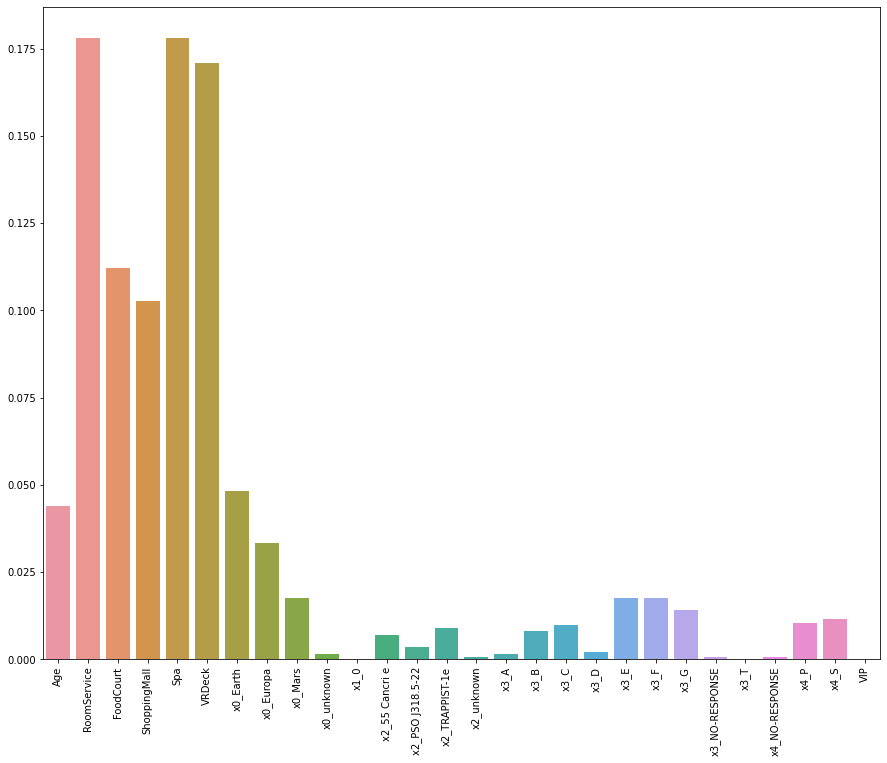

In [156]:
plt.figure(figsize= (15,12))  # 피쳐의 중요도, 가중치 시각화
sns.barplot(x = X_train.columns, y =model_final.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

의외로 Roomservice 나 Foodcourt, 쇼핑몰등에서 사용한 금액이 중요한 변수로 작용한 것을 볼 수 있다. 그리고 그 다음으로는 나이와 출발지가 중요한 변수로 작용한 것을 확인할 수 있다.

예측과는 다르게 VIP나 좌석은 크게 작용하지 않은 것을 볼 수 있다.

In [160]:
test_predicted = model_final.predict(test)
# test 예측

# submission

In [162]:
submission = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\AI Class\Data\future_titanic\submission(4).csv')


In [164]:
submission['Transported'] = test_predicted

In [166]:
submission.to_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\AI Class\Data\future_titanic\submission_10_11.csv',index = False)